In [9]:
library(tidyverse)
library(MLmetrics)

In [2]:
pandas = read_tsv("~/RIDIR/Datasets/AreaInterpolateValidation/geopandas_intensive2010.tsv", col_names = c("TID", "pandas")) %>%
    arrange(desc(pandas))
head(pandas)
nrow(pandas)

Parsed with column specification:
cols(
  TID = col_character(),
  pandas = col_double()
)


TID,pandas
T42101000332,19.19754
T42101000365,16.92458
T42101000331,16.64821
T42101000315,16.09803
T42101003898,15.26946
T42101000221,15.17521


[1] 367

In [3]:
spark = read_tsv("~/RIDIR/Datasets/AreaInterpolateValidation/geospark_intensive2010.tsv", col_names = c("TID", "spark")) %>%
    arrange(desc(spark))
head(spark)
nrow(spark)

Parsed with column specification:
cols(
  TID = col_character(),
  spark = col_double()
)


TID,spark
T42101000332,19.19754
T42101000365,16.92458
T42101000331,16.64821
T42101000315,16.09803
T42101003898,15.26946
T42101000221,15.17521


[1] 367

In [4]:
table = pandas %>% left_join(spark, by = c("TID"))
head(table)
nrow(table)

TID,pandas,spark
T42101000332,19.19754,19.19754
T42101000365,16.92458,16.92458
T42101000331,16.64821,16.64821
T42101000315,16.09803,16.09803
T42101003898,15.26946,15.26946
T42101000221,15.17521,15.17521


[1] 367

In [5]:
head(table %>% filter(is.na(spark)))

TID,pandas,spark


In [6]:
table = spark %>% inner_join(pandas, by = c("TID")) %>% 
    mutate(diff = abs(pandas - spark)) %>%
    arrange(desc(diff))
head(table)
nrow(table)

TID,spark,pandas,diff
T42101000362,13.816088,13.816088,5.329071e-15
T42101000293,2.022901,2.022901,4.440892e-15
T42101000331,16.648214,16.648214,3.552714e-15
T42101000316,14.721355,14.721355,3.552714e-15
T42101000184,12.239330,12.239330,3.552714e-15
T42101000234,11.637166,11.637166,3.552714e-15


[1] 367

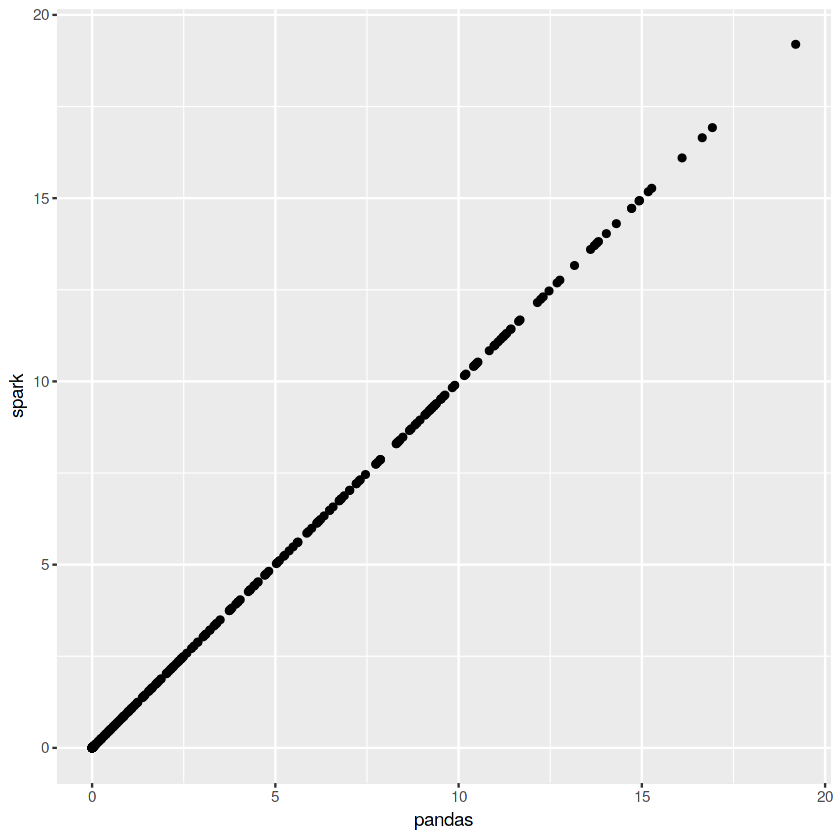

In [7]:
ggplot(data = table, aes(x = pandas, y = spark)) + geom_point()

In [8]:
print(paste("R2:   ", R2_Score(table$spark, table$pandas)))
print(paste("MAE:  ",      MAE(table$spark, table$pandas)))
print(paste("MSE:  ",      MSE(table$spark, table$pandas)))
print(paste("RMSE: ",     RMSE(table$spark, table$pandas)))
print(paste("RAE:  ",      RAE(table$spark, table$pandas)))


[1] "R2:    1"
[1] "MAE:   3.84957596597616e-16"
[1] "MSE:   7.94549423346953e-31"
[1] "RMSE:  8.91375018354763e-16"
[1] "RAE:   1.01801250717404e-16"
